In [1]:
# Install required packages
!pip install numpy pandas scikit-learn matplotlib seaborn tensorflow optuna xgboost lightgbm shap fastapi uvicorn joblib

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import shap

# Machine Learning & Deep Learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# FastAPI & Deployment
import fastapi
import uvicorn
import joblib
import os


C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
url="https://raw.githubusercontent.com/KunalPShukla/ImagoAI_Task/refs/heads/main/MLE-Assignment.csv"
df=pd.read_csv(url)
print('Duplicate rows:',df.duplicated().sum())
print('Columns with null values:',len(df.columns[df.isnull().sum()>0]))
print(df.info())
# Show first five rows
display(df.head())

Duplicate rows: 0
Columns with null values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [3]:
df.drop('hsi_id',axis=1,inplace=True)

In [4]:
# Exploring the target column
# Count rows where 'vomitoxin_ppb' is 0
count_zero_target = df[df['vomitoxin_ppb'] == 0].shape[0]

Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = df[(df['vomitoxin_ppb'] < lower_bound) | (df['vomitoxin_ppb'] > upper_bound)]

# Step 5: Count outliers
outlier_count = outliers.shape[0]

# Print counts
print(f"Number of rows with zero in 'vomitoxin_ppb': {count_zero_target}")
print(f"Number of outliers in 'vomitoxin_ppb': {outlier_count}")

Number of rows with zero in 'vomitoxin_ppb': 88
Number of outliers in 'vomitoxin_ppb': 80


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


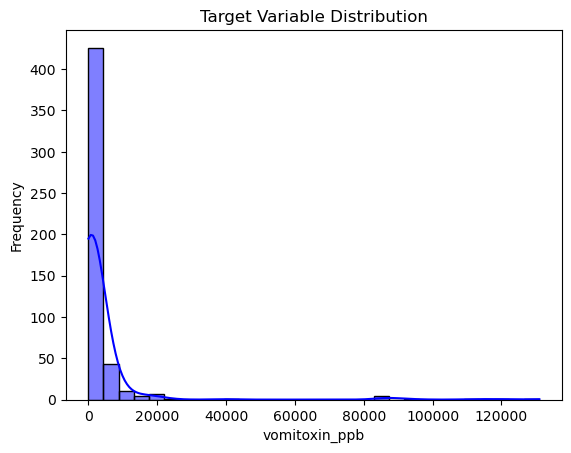

Skewness of vomitoxin_ppb: 7.225180854841568


In [5]:
# Plot the frequency distribution of the target variable
sns.histplot(df['vomitoxin_ppb'], kde=True, color='blue', bins=30)
plt.title("Target Variable Distribution")
plt.xlabel("vomitoxin_ppb")
plt.ylabel("Frequency")
plt.show()

# Calculate and print skewness
print("Skewness of vomitoxin_ppb:", df['vomitoxin_ppb'].skew())

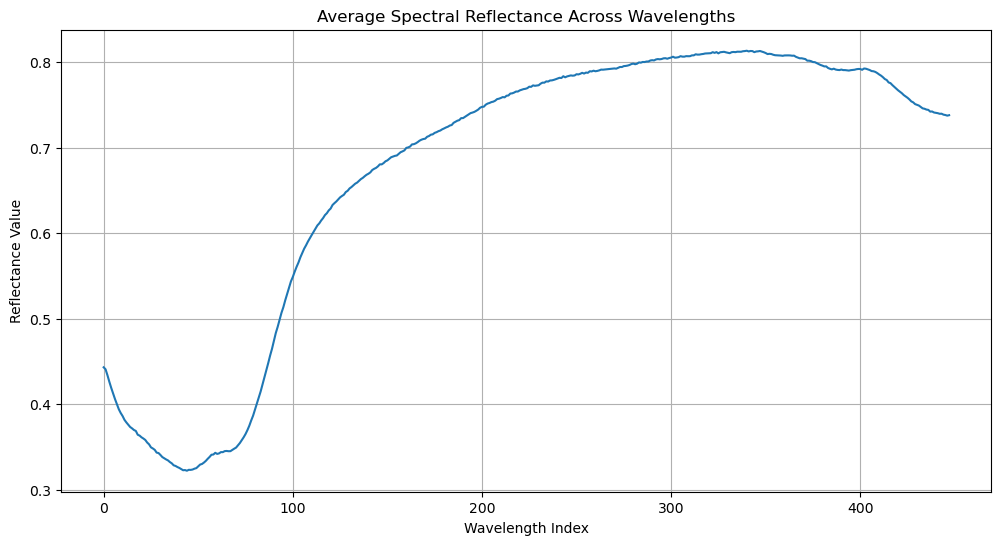

In [6]:
# Line plot of average reflectance across wavelengths
plt.figure(figsize=(12, 6))
df.iloc[:, :-1].mean().plot()
plt.title("Average Spectral Reflectance Across Wavelengths")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance Value")
plt.grid()
plt.show()

In [7]:
# Selecting Feautures and Target Column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 97% variance
pca = PCA(n_components=0.97)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (400, 22), Testing set size: (100, 22)


Choosing best Transformation function for pre-processing

In [9]:
# -------------------- TRANSFORMATION FUNCTIONS --------------------
def transform_none(y, X):
    """No transformation."""
    return y, X, len(y)

def transform_log1p(y, X):
    """Apply log1p transformation (log(1+y)); handles zeros naturally."""
    return np.log1p(y), X, len(y)

def transform_boxcox(y, X):
    """
    Apply Box-Cox transformation. Since Box-Cox requires strictly positive values,
    shift the data by +1.
    """
    shift = 1
    y_shifted = y + shift
    y_boxcox, _ = boxcox(y_shifted)
    return y_boxcox, X, len(y)

def transform_yeojohnson(y, X):
    """Apply Yeo-Johnson transformation; handles zeros natively."""
    pt = PowerTransformer(method='yeo-johnson')
    y_transformed = pt.fit_transform(y.values.reshape(-1, 1)).flatten()  # Fix applied here
    return y_transformed, X, len(y)


# Dictionary of methods
methods = {
    "No Transformation": transform_none,
    "Log1p Transformation": transform_log1p,
    "Box-Cox Transformation": transform_boxcox,
    "Yeo-Johnson Transformation": transform_yeojohnson
}

# -------------------- MODEL EVALUATION FUNCTION --------------------
def evaluate_model(X, y, method_name):
   
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=0.97)
    X_pca = pca.fit_transform(X_scaled)
    print(f"{method_name} - Shape after PCA: {X_pca.shape}")
    
    # Define Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Perform 5-Fold CV
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = cross_val_score(rf, X_pca, y, cv=kf, scoring='r2')
    
    print(f"{method_name} - Individual R² scores: {r2_scores}")
    print(f"{method_name} - Mean R² score: {r2_scores.mean():.4f}\n")
    return r2_scores.mean()

# -------------------- COMPARE METHODS --------------------
results = {}
for method_name, func in methods.items():
    print(f"=== {method_name} ===")
    y_transformed, X_transformed, count = func(y, X)
   
    mean_r2 = evaluate_model(X_transformed, y_transformed, method_name)
    results[method_name] = (count, mean_r2)

# # -------------------- SUMMARY --------------------
# print("Summary of Methods:")
# for method_name, (count, mean_r2) in results.items():
#     print(f"{method_name}: Rows after = {count}, Mean R² = {mean_r2:.4f}")

=== No Transformation ===
No Transformation - Shape after PCA: (500, 22)
No Transformation - Individual R² scores: [ 0.80265807  0.41873321 -0.01060036  0.59398903  0.9440268 ]
No Transformation - Mean R² score: 0.5498

=== Log1p Transformation ===
Log1p Transformation - Shape after PCA: (500, 22)
Log1p Transformation - Individual R² scores: [0.14029208 0.20082422 0.22459162 0.2465048  0.15132698]
Log1p Transformation - Mean R² score: 0.1927

=== Box-Cox Transformation ===
Box-Cox Transformation - Shape after PCA: (500, 22)
Box-Cox Transformation - Individual R² scores: [0.28518838 0.27815486 0.32231199 0.38652639 0.31050432]
Box-Cox Transformation - Mean R² score: 0.3165

=== Yeo-Johnson Transformation ===
Yeo-Johnson Transformation - Shape after PCA: (500, 22)
Yeo-Johnson Transformation - Individual R² scores: [0.28401241 0.27260512 0.31355155 0.38993857 0.30880839]
Yeo-Johnson Transformation - Mean R² score: 0.3138



Random Forest Hyper-parameter tuning

In [10]:
# Define hyperparameter grid
y_shifted = y + 1  # Ensure all values are positive
y_boxcox, lambda_ = boxcox(y_shifted)  # Store lambda for inverse transformation

# Train-Test Split
X_train_pca, X_test_pca, y_train_boxcox, y_test_boxcox= train_test_split(
    X_pca, y_boxcox, test_size=0.2, random_state=42
)

# Define Hyperparameter Grid
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Train-Test Split
X_train_pca, X_test_pca, y_train_boxcox, y_test_boxcox = train_test_split(
    X_pca, y_boxcox, test_size=0.2, random_state=42
)

# Define Hyperparameter Grid
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Train Model using RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(
    rf_model, rf_param_grid, n_iter=20, cv=5, 
    scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)
rf_random_search.fit(X_train_pca, y_train_boxcox)  # Fit on training data only

# Best Model from Search
best_rf = rf_random_search.best_estimator_

# Predict on Test Set and Apply Inverse Box-Cox
y_pred_rf_boxcox = best_rf.predict(X_test_pca)
y_pred_rf = inv_boxcox(y_pred_rf_boxcox, lambda_)  # Apply inverse transformation only on test predictions

# Evaluate Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print Results
print("Best Random Forest Parameters:", rf_random_search.best_params_)
print(f"[Random Forest] MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2 Score: {r2_rf:.4f}")

Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
[Random Forest] MAE: 3709.9988, RMSE: 14658.8078, R2 Score: 0.2313


XGBoost Hyper-parameter tuning

In [11]:
# Apply Box-Cox transformation to y (ensure all values are positive)
y_shifted = y + 1  # Avoid zero or negative values
y_boxcox, lambda_ = boxcox(y_shifted)  # Store lambda for inverse transformation
# Train-Test Split
X_train_pca, X_test_pca, y_train_boxcox, y_test_boxcox, y_train, y_test = train_test_split(
    X_pca, y_boxcox, y, test_size=0.2, random_state=42
)

# Define Hyperparameter Grid
xgb_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3]
}

# Train XGBoost Model with RandomizedSearchCV
xgb_model = XGBRegressor(random_state=42)
xgb_random_search = RandomizedSearchCV(
    xgb_model, xgb_param_grid, n_iter=20, cv=5, 
    scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)
xgb_random_search.fit(X_train_pca, y_train_boxcox)  # Fit on training data only

# Best Model from Search
best_xgb = xgb_random_search.best_estimator_

# Predict on Test Set and Apply Inverse Box-Cox
y_pred_xgb_boxcox = best_xgb.predict(X_test_pca)
y_pred_xgb = inv_boxcox(y_pred_xgb_boxcox, lambda_)  # Apply inverse transformation only on test predictions

# Evaluate Model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print Results
print("Best XGBoost Parameters:", xgb_random_search.best_params_)
print(f"[XGBoost] MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R2 Score: {r2_xgb:.4f}")

Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
[XGBoost] MAE: 3775.5626, RMSE: 14757.4475, R2 Score: 0.2209


In [13]:
def preprocess_data(df, test_size=0.2, random_state=42):
    # Extract features and target
    X, y = df.iloc[:, :-1], df.iloc[:, -1]

    # Scale the features (No PCA here)
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    # Save the scaler for future use
    joblib.dump(scaler, "scaler.pkl")

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)
    print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

    return X_train, X_test, y_train, y_test

def build_neural_network(trial, input_shape):
    # Hyperparameter search
    n_layers = trial.suggest_int("n_layers", 2, 4)
    units = [trial.suggest_int(f"n_units_l{i}", 32, 256) for i in range(n_layers)]
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # Build model
    model = keras.Sequential()
    model.add(layers.Dense(units[0], activation=activation, input_shape=(input_shape,)))
    for i in range(1, n_layers):
        model.add(layers.Dense(units[i], activation=activation))
    model.add(layers.Dense(1))

    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def objective(trial):
    global X_train, X_test, y_train, y_test

    model = build_neural_network(trial, X_train.shape[1])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

# Prepare data (no PCA involved)
X_train, X_test, y_train, y_test = preprocess_data(df)

# Hyperparameter optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the best model
best_model = build_neural_network(optuna.trial.FixedTrial(best_params), X_train.shape[1])
best_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred_nn = best_model.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"[Neural Network] MAE: {mae_nn:.4f}, RMSE: {rmse_nn:.4f}, R2 Score: {r2_nn:.4f}")

[I 2025-03-16 19:50:50,936] A new study created in memory with name: no-name-f378f620-44af-42e7-a31a-23f4fb69be46


Training set: (400, 448), Testing set: (100, 448)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


[I 2025-03-16 19:51:15,607] Trial 0 finished with value: 12859.843380874729 and parameters: {'n_layers': 2, 'n_units_l0': 184, 'n_units_l1': 79, 'activation': 'relu', 'learning_rate': 0.00026304367321020565}. Best is trial 0 with value: 12859.843380874729.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2025-03-16 19:51:36,988] Trial 1 finished with value: 17250.72957627591 and parameters: {'n_layers': 2, 'n_units_l0': 33, 'n_units_l1': 89, 'activation': 'tanh', 'learning_rate': 0.0018451168176310958}. Best is trial 0 with value: 12859.843380874729.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002439D464B80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


[I 2025-03-16 19:51:55,125] Trial 2 finished with value: 17194.159524474115 and parameters: {'n_layers': 4, 'n_units_l0': 48, 'n_units_l1': 240, 'n_units_l2': 35, 'n_units_l3': 158, 'activation': 'tanh', 'learning_rate': 0.003700015261929472}. Best is trial 0 with value: 12859.843380874729.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


[I 2025-03-16 19:52:11,833] Trial 3 finished with value: 10441.925254854264 and parameters: {'n_layers': 2, 'n_units_l0': 121, 'n_units_l1': 123, 'activation': 'relu', 'learning_rate': 0.0014262456189429735}. Best is trial 3 with value: 10441.925254854264.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[I 2025-03-16 19:52:29,250] Trial 4 finished with value: 10125.466832222333 and parameters: {'n_layers': 2, 'n_units_l0': 210, 'n_units_l1': 201, 'activation': 'relu', 'learning_rate': 0.0006583291074342216}. Best is trial 4 with value: 10125.466832222333.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[I 2025-03-16 19:52:46,396] Trial 5 finished with value: 17264.40311898353 and parameters: {'n_layers': 2, 'n_units_l0': 59, 'n_units_l1': 189, 'activation': 'tanh', 'learning_rate': 0.0005264286213313041}. Best is trial 4 with value: 10125.466832222333.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2025-03-16 19:53:07,220] Trial 6 finished with value: 17279.764076966963 and parameters: {'n_layers': 3, 'n_units_l0': 60, 'n_units_l1': 48, 'n_units_l2': 167, 'activation': 'tanh', 'learning_rate': 0.0001920053313867714}. Best is trial 4 with value: 10125.466832222333.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


[I 2025-03-16 19:53:29,563] Trial 7 finished with value: 15613.339604107145 and parameters: {'n_layers': 2, 'n_units_l0': 215, 'n_units_l1': 53, 'activation': 'relu', 'learning_rate': 0.00016189971064645733}. Best is trial 4 with value: 10125.466832222333.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


[I 2025-03-16 19:53:49,010] Trial 8 finished with value: 17270.605430822536 and parameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 60, 'activation': 'tanh', 'learning_rate': 0.001376955195115456}. Best is trial 4 with value: 10125.466832222333.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-16 19:54:09,159] Trial 9 finished with value: 10112.802836881274 and parameters: {'n_layers': 2, 'n_units_l0': 98, 'n_units_l1': 185, 'activation': 'relu', 'learning_rate': 0.0017057078833613037}. Best is trial 9 with value: 10112.802836881274.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-03-16 19:54:33,483] Trial 10 finished with value: 7180.027848829418 and parameters: {'n_layers': 3, 'n_units_l0': 156, 'n_units_l1': 161, 'n_units_l2': 240, 'activation': 'relu', 'learning_rate': 0.008077415099487123}. Best is trial 10 with value: 7180.027848829418.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-03-16 19:54:59,754] Trial 11 finished with value: 6085.503739946641 and parameters: {'n_layers': 3, 'n_units_l0': 152, 'n_units_l1': 167, 'n_units_l2': 254, 'activation': 'relu', 'learning_rate': 0.00856363932808647}. Best is trial 11 with value: 6085.503739946641.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[I 2025-03-16 19:55:22,045] Trial 12 finished with value: 5846.11559265592 and parameters: {'n_layers': 3, 'n_units_l0': 163, 'n_units_l1': 147, 'n_units_l2': 249, 'activation': 'relu', 'learning_rate': 0.009874854119990896}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[I 2025-03-16 19:55:42,909] Trial 13 finished with value: 11477.428649571837 and parameters: {'n_layers': 4, 'n_units_l0': 161, 'n_units_l1': 131, 'n_units_l2': 255, 'n_units_l3': 47, 'activation': 'relu', 'learning_rate': 0.008315646554046359}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


[I 2025-03-16 19:56:09,019] Trial 14 finished with value: 9022.2277883722 and parameters: {'n_layers': 3, 'n_units_l0': 248, 'n_units_l1': 150, 'n_units_l2': 189, 'activation': 'relu', 'learning_rate': 0.004011030758473696}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-16 19:56:26,951] Trial 15 finished with value: 7394.41040220583 and parameters: {'n_layers': 3, 'n_units_l0': 132, 'n_units_l1': 222, 'n_units_l2': 218, 'activation': 'relu', 'learning_rate': 0.004498410617824879}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-16 19:56:44,429] Trial 16 finished with value: 9346.735280282053 and parameters: {'n_layers': 4, 'n_units_l0': 183, 'n_units_l1': 114, 'n_units_l2': 95, 'n_units_l3': 252, 'activation': 'relu', 'learning_rate': 0.008942892816626882}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


[I 2025-03-16 19:57:02,822] Trial 17 finished with value: 9684.21043341433 and parameters: {'n_layers': 3, 'n_units_l0': 110, 'n_units_l1': 165, 'n_units_l2': 125, 'activation': 'relu', 'learning_rate': 0.0028966663261939395}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


[I 2025-03-16 19:57:18,998] Trial 18 finished with value: 10724.914688983778 and parameters: {'n_layers': 3, 'n_units_l0': 184, 'n_units_l1': 101, 'n_units_l2': 207, 'activation': 'relu', 'learning_rate': 0.005619989913207387}. Best is trial 12 with value: 5846.11559265592.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-03-16 19:57:34,822] Trial 19 finished with value: 7862.426371746956 and parameters: {'n_layers': 4, 'n_units_l0': 146, 'n_units_l1': 210, 'n_units_l2': 255, 'n_units_l3': 33, 'activation': 'relu', 'learning_rate': 0.0026987231593259228}. Best is trial 12 with value: 5846.11559265592.


Best Hyperparameters: {'n_layers': 3, 'n_units_l0': 163, 'n_units_l1': 147, 'n_units_l2': 249, 'activation': 'relu', 'learning_rate': 0.009874854119990896}
Epoch 1/50


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\2007853569.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 77875208.0000 - mae: 2734.8452 - val_loss: 219118432.0000 - val_mae: 4541.4980
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 67981632.0000 - mae: 3133.1628 - val_loss: 81829272.0000 - val_mae: 3814.8450
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71552832.0000 - mae: 2407.4229 - val_loss: 96514448.0000 - val_mae: 3641.0144
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 84908528.0000 - mae: 3107.2256 - val_loss: 259374960.0000 - val_mae: 4062.6794
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 209323632.0000 - mae: 3801.8489 - val_loss: 201603584.0000 - val_mae: 4265.1260
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 129283312.0000 - mae: 3339.5857 - val_loss: 194224560.0000 - val_mae: 3596.1504
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 104284832.0000 - mae: 3263.6155 - val_loss: 127710328.0000 - val_mae: 3354.3525
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/ste

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21892126.0000 - mae: 1766.5784 - val_loss: 42564880.0000 - val_mae: 2670.3674
Epoch 49/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8953425.0000 - mae: 1566.6307 - val_loss: 44208476.0000 - val_mae: 2653.9824
Epoch 50/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8152879.0000 - mae: 1446.9331 - val_loss: 41509060.0000 - val_mae: 2613.6201
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[Neural Network] MAE: 2613.6201, RMSE: 6442.7526, R2 Score: 0.8515


PermutationExplainer explainer: 101it [01:54,  1.26s/it]                                                               
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\1934302484.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_test, feature_names=df.columns[0:-1])


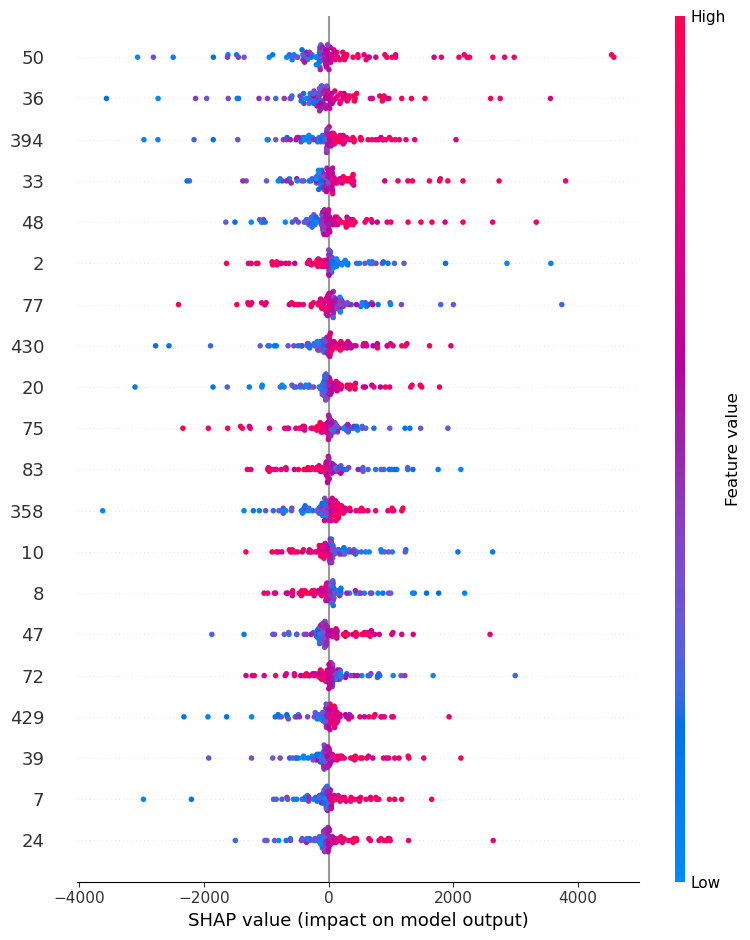

In [34]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test, max_evals=900)

# Plot SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values.values, X_test, feature_names=df.columns[0:-1])
plt.show()

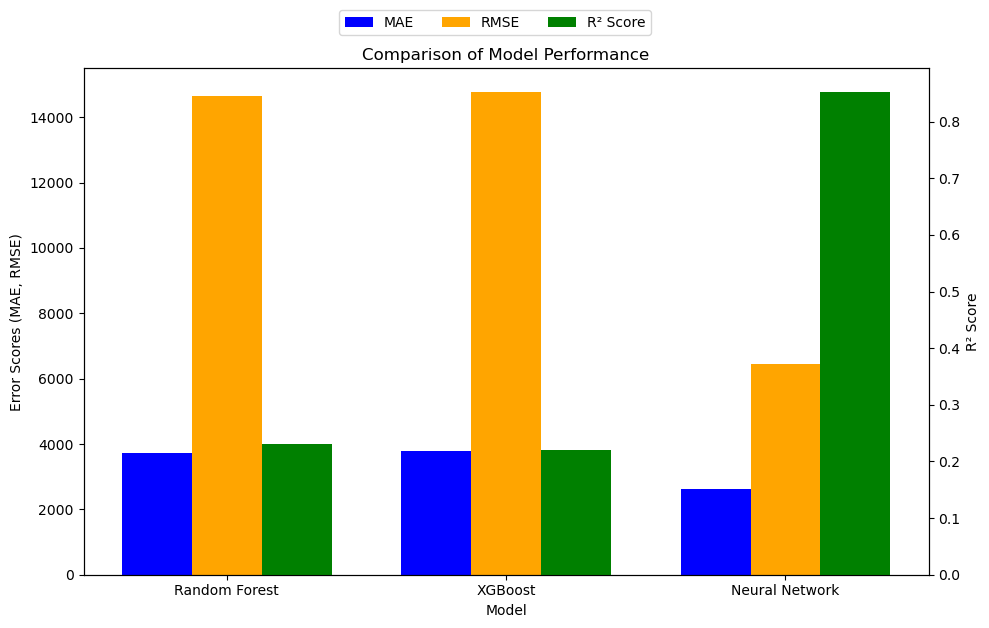

In [25]:
# Evaluation metrics 
models = ['Random Forest', 'XGBoost', 'Neural Network']
mae_scores = [mae_rf, mae_xgb, mae_nn]  
rmse_scores = [rmse_rf, rmse_xgb, rmse_nn]  
r2_scores = [r2_rf, r2_xgb, r2_nn]  

# X-axis positions
x = np.arange(len(models))

# Bar width
width = 0.25

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bars for MAE and RMSE
ax1.bar(x - width, mae_scores, width, label='MAE', color='blue') 
ax1.bar(x, rmse_scores, width, label='RMSE', color='orange') 

# Create a second y-axis for R² scores
ax2 = ax1.twinx()
ax2.bar(x + width, r2_scores, width, label='R² Score', color='green')

# Adding labels, title, and custom x-axis tick labels
ax1.set_xlabel('Model')
ax1.set_ylabel('Error Scores (MAE, RMSE)')
ax2.set_ylabel('R² Score')
ax1.set_title('Comparison of Model Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Legends for both axes in one box
fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
# Save the Deep Learning model
best_model.save("best_neural_network.h5")
print("Model saved successfully.")

Model saved successfully.
